In [ ]:
# Install chromium, its driver, and selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

# Import necessary libraries
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import time
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set up headless Chrome options for running in Colab
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")

# URL of the YouTube video
video_url = "https://www.youtube.com/watch?v=8r0TPD5NUQ0"

# Set up the WebDriver
driver = webdriver.Chrome(options=chrome_options)  # Removed the 'executable_path'

# Open the YouTube video page
driver.get(video_url)

# Wait for the page to load
time.sleep(5)

# Scroll to load comments
for _ in range(10):  # Adjust the range as needed
    driver.execute_script("window.scrollBy(0,1000)")
    time.sleep(2)

# Find all comment elements
comments = driver.find_elements(By.CSS_SELECTOR, "ytd-comment-renderer #content-text")

# Save comments to a text file in Google Drive
with open('/content/drive/My Drive/youtube_comments.txt', 'w') as file:
    for comment in comments:
        file.write(comment.text + '\n')

# Close the browser
driver.quit()


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
chromium-chromedriver is already the newest version (1:85.0.4183.83-0ubuntu2.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 9 no

In [ ]:
# Install necessary libraries
!pip install textblob nltk

# Import libraries
from textblob import TextBlob
import nltk

# Download necessary NLTK data
nltk.download('punkt')

# Function to perform sentiment analysis
def analyze_sentiment(comment):
    analysis = TextBlob(comment)
    return analysis.sentiment

# Read comments from the text file
file_path = '/content/drive/My Drive/youtube_comments.txt'
with open(file_path, 'r') as file:
    comments = file.readlines()

# Perform sentiment analysis on each comment
sentiments = [analyze_sentiment(comment) for comment in comments]

# Output the results
for comment, sentiment in zip(comments, sentiments):
    print(f"Comment: {comment.strip()}")
    print(f"Sentiment: {sentiment}")
    print("-" * 30)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Comment: It would be really cool if there was a "walk in place" version of this available for VR!  No one's cracked the code on how to walk around in virtual reality (that feels natural and doesn't take up half your living room) yet, but maybe it could be done with reverse-moonwalker shoes?
Sentiment: Sentiment(polarity=0.19583333333333333, subjectivity=0.40416666666666673)
------------------------------
Comment: As an electric skateboard builder I can really respect the time and effort put into these!
Sentiment: Sentiment(polarity=0.25, subjectivity=0.2)
------------------------------
Comment: This reminds me of the moving flat elevators at the air port when you walk forward on them it’s a cool feeling
Sentiment: Sentiment(polarity=0.16249999999999998, subjectivity=0.3875)
------------------------------
Comment: I bet that if you make it so you stay in one place, these would be groundbreaking for VR games.
Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)
--------------------------

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


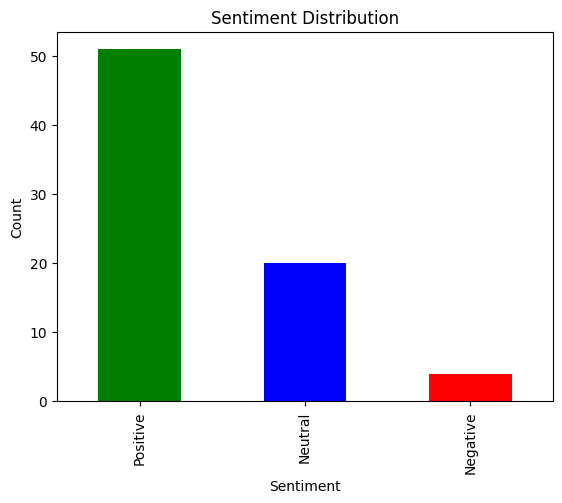

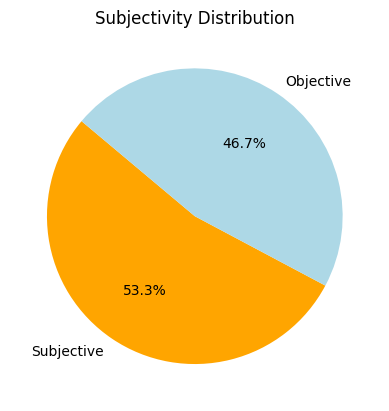

In [ ]:
# Install necessary libraries
!pip install textblob nltk pandas matplotlib

# Import libraries
from textblob import TextBlob
import nltk
import pandas as pd
import matplotlib.pyplot as plt

# Download necessary NLTK data
nltk.download('punkt')

# Function to perform sentiment analysis
def analyze_sentiment(comment):
    analysis = TextBlob(comment)
    return analysis.sentiment

# Read comments from the text file
file_path = '/content/drive/My Drive/youtube_comments.txt'
with open(file_path, 'r') as file:
    comments = file.readlines()

# Perform sentiment analysis on each comment
sentiments = [analyze_sentiment(comment) for comment in comments]

# Categorize sentiments and subjectivities
sentiment_categories = ['Positive' if sentiment.polarity > 0
                        else 'Negative' if sentiment.polarity < 0
                        else 'Neutral'
                        for sentiment in sentiments]

subjectivity_categories = ['Subjective' if sentiment.subjectivity >= 0.5 else 'Objective'
                           for sentiment in sentiments]

# Creating DataFrames for plots
df_sentiments = pd.DataFrame(sentiment_categories, columns=['Sentiment'])
df_subjectivity = pd.DataFrame(subjectivity_categories, columns=['Subjectivity'])

# Plotting Sentiment Distribution
df_sentiments['Sentiment'].value_counts().plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Plotting Subjectivity Distribution
df_subjectivity['Subjectivity'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['orange', 'lightblue'])
plt.title('Subjectivity Distribution')
plt.ylabel('')
plt.show()
